In [2]:
import pandas as pd
import numpy as np

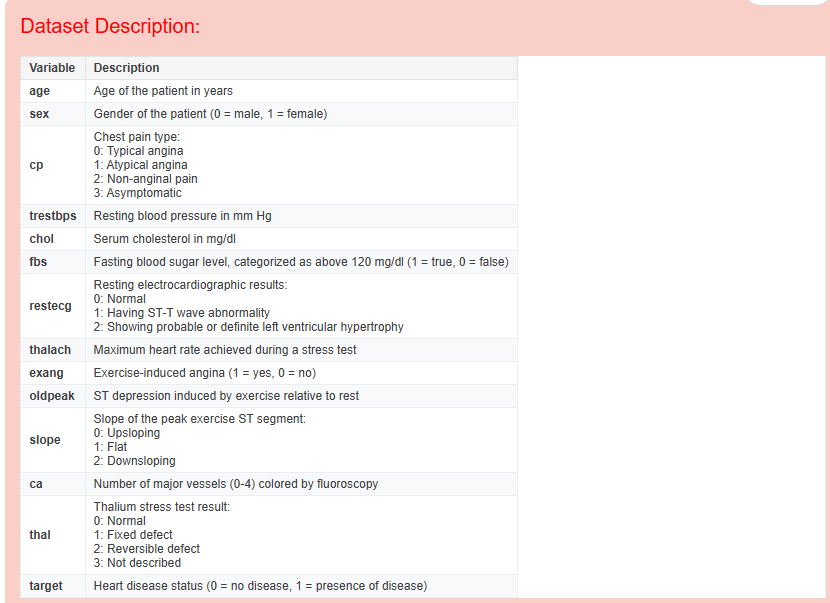

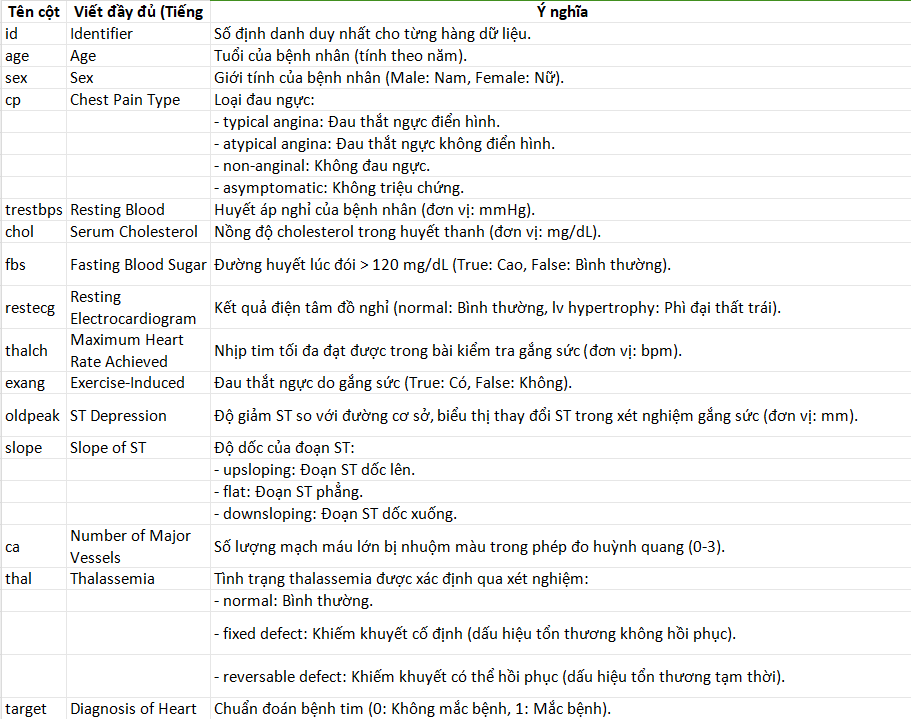

## Mô tả dữ liệu

In [8]:
df_heart = pd.read_csv('heart_disease.csv')
df_heart

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,1
918,919,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [11]:
df_heart[['ca']][df_heart[['ca']].isna().all(axis=1)]

,ca
166,NaN
192,NaN
287,NaN
302,NaN
303,NaN
...,...
915,NaN
916,NaN
917,NaN
918,NaN


In [411]:
df_heart.select_dtypes(include=('int64', 'float64')).head()

,id,age,trestbps,chol,thalch,oldpeak,ca,target
0,1,63,145.0,233.0,150.0,2.3,0.0,0
1,2,67,160.0,286.0,108.0,1.5,3.0,1
2,3,67,120.0,229.0,129.0,2.6,2.0,1
3,4,37,130.0,250.0,187.0,3.5,0.0,0
4,5,41,130.0,204.0,172.0,1.4,0.0,0


In [412]:
df_heart.select_dtypes(include=('object')).head()

,sex,cp,fbs,restecg,exang,slope,thal
0,Male,typical angina,True,lv hypertrophy,False,downsloping,fixed defect
1,Male,asymptomatic,False,lv hypertrophy,True,flat,normal
2,Male,asymptomatic,False,lv hypertrophy,True,flat,reversable defect
3,Male,non-anginal,False,normal,False,downsloping,normal
4,Female,atypical angina,False,lv hypertrophy,False,upsloping,normal


In [413]:
df_heart.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,target
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.553261
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,0.497426
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,1.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,1.000000


In [414]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  target    920 non-null    int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 107.9+ KB


### Tách các đặc trưng số và mục lục(Categories)

In [415]:
numeric_col = ['id', 'age',	'trestbps',	'chol',	'thalch',	'oldpeak',	'ca',	'target']
numeric_col


['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']

In [416]:
categories_col = [column for column in df_heart.columns if column not in numeric_col]
categories_col

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [417]:
df_numeric = df_heart[numeric_col]
df_numeric

,id,age,trestbps,chol,thalch,oldpeak,ca,target
0,1,63,145.0,233.0,150.0,2.3,0.0,0
1,2,67,160.0,286.0,108.0,1.5,3.0,1
2,3,67,120.0,229.0,129.0,2.6,2.0,1
3,4,37,130.0,250.0,187.0,3.5,0.0,0
4,5,41,130.0,204.0,172.0,1.4,0.0,0
...,...,...,...,...,...,...,...,...
915,916,54,127.0,333.0,154.0,0.0,NaN,1
916,917,62,NaN,139.0,NaN,NaN,NaN,0
917,918,55,122.0,223.0,100.0,0.0,NaN,1
918,919,58,NaN,385.0,NaN,NaN,NaN,0


In [418]:
df_categories = df_heart[categories_col]
df_categories.dtypes

sex        object
cp         object
fbs        object
restecg    object
exang      object
slope      object
thal       object
dtype: object

In [419]:
df_numeric.dtypes

id            int64
age           int64
trestbps    float64
chol        float64
thalch      float64
oldpeak     float64
ca          float64
target        int64
dtype: object

### Numeric columns

In [420]:
import matplotlib.pyplot as plt
import seaborn as sns

In [421]:
df_numeric.isna().sum()

id            0
age           0
trestbps     59
chol         30
thalch       55
oldpeak      62
ca          611
target        0
dtype: int64

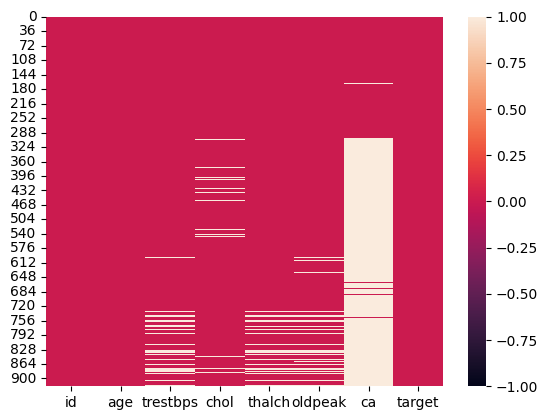

In [422]:
sns.heatmap(df_numeric.isna(), vmin=-1, vmax=1);

In [423]:
corr = df_numeric[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']].corr()
corr

,age,trestbps,chol,thalch,oldpeak,ca,target
age,1.000000,0.244253,-0.086234,-0.365778,0.258243,0.370416,0.282700
trestbps,0.244253,1.000000,0.092853,-0.104899,0.161908,0.093705,0.106233
chol,-0.086234,0.092853,1.000000,0.236121,0.047734,0.051606,-0.230583
thalch,-0.365778,-0.104899,0.236121,1.000000,-0.151174,-0.264094,-0.394503
oldpeak,0.258243,0.161908,0.047734,-0.151174,1.000000,0.281817,0.385528
ca,0.370416,0.093705,0.051606,-0.264094,0.281817,1.000000,0.455599
target,0.282700,0.106233,-0.230583,-0.394503,0.385528,0.455599,1.000000


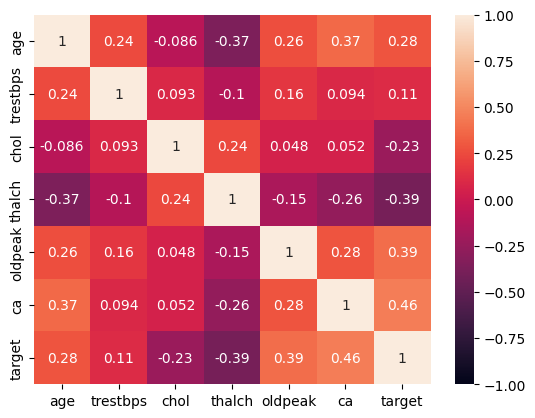

In [424]:
sns.heatmap(data=corr, annot=True,
            vmin=-1, vmax=1);

### Xử lý outliners


In [425]:
def bound(x):
    # Bỏ qua giá trị NaN khi tính toán
    q1 = np.nanquantile(x, 0.25)  # Tính Q1, bỏ qua NaN
    q3 = np.nanquantile(x, 0.75)  # Tính Q3, bỏ qua NaN
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    return [lower_bound, upper_bound]



In [426]:
outliers = {}
for col in numeric_col:
    Q1 = df_numeric[col].quantile(0.25)
    Q3 = df_numeric[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df_numeric[(df_numeric[col] < lower_bound) | (df_numeric[col] > upper_bound)]


# df = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]

data_cleaned = df_numeric.copy()
data_cleaned

,id,age,trestbps,chol,thalch,oldpeak,ca,target
0,1,63,145.0,233.0,150.0,2.3,0.0,0
1,2,67,160.0,286.0,108.0,1.5,3.0,1
2,3,67,120.0,229.0,129.0,2.6,2.0,1
3,4,37,130.0,250.0,187.0,3.5,0.0,0
4,5,41,130.0,204.0,172.0,1.4,0.0,0
...,...,...,...,...,...,...,...,...
915,916,54,127.0,333.0,154.0,0.0,NaN,1
916,917,62,NaN,139.0,NaN,NaN,NaN,0
917,918,55,122.0,223.0,100.0,0.0,NaN,1
918,919,58,NaN,385.0,NaN,NaN,NaN,0


In [427]:
data_cleaned = df_numeric.copy()
for col in numeric_col:
    Q1 = df_numeric[col].quantile(0.25)
    Q3 = df_numeric[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_cleaned = data_cleaned[(data_cleaned[col] >= lower_bound) & (data_cleaned[col] <= upper_bound)]


data_cleaned

,id,age,trestbps,chol,thalch,oldpeak,ca,target
0,1,63,145.0,233.0,150.0,2.3,0.0,0
2,3,67,120.0,229.0,129.0,2.6,2.0,1
3,4,37,130.0,250.0,187.0,3.5,0.0,0
4,5,41,130.0,204.0,172.0,1.4,0.0,0
5,6,56,120.0,236.0,178.0,0.8,0.0,0
...,...,...,...,...,...,...,...,...
300,301,57,130.0,131.0,115.0,1.2,1.0,1
301,302,57,130.0,236.0,174.0,0.0,1.0,1
414,415,50,120.0,168.0,160.0,0.0,0.0,0
508,509,47,150.0,226.0,98.0,1.5,0.0,1


In [428]:
df_numeric.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,target
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.553261
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,0.497426
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,1.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,1.000000


In [429]:
data_cleaned.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,target
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,155.041199,53.865169,129.580524,241.947566,150.265918,0.928090,0.490637,0.423221
std,100.013994,8.944933,15.446612,46.070772,23.178623,1.000562,0.711682,0.494998
min,1.000000,29.000000,94.000000,100.000000,71.000000,0.000000,0.000000,0.000000
25%,72.500000,47.000000,120.000000,209.000000,136.000000,0.000000,0.000000,0.000000
50%,148.000000,55.000000,130.000000,239.000000,155.000000,0.600000,0.000000,0.000000
75%,235.500000,60.000000,140.000000,269.500000,168.000000,1.500000,1.000000,1.000000
max,749.000000,76.000000,170.000000,394.000000,202.000000,3.600000,2.000000,1.000000


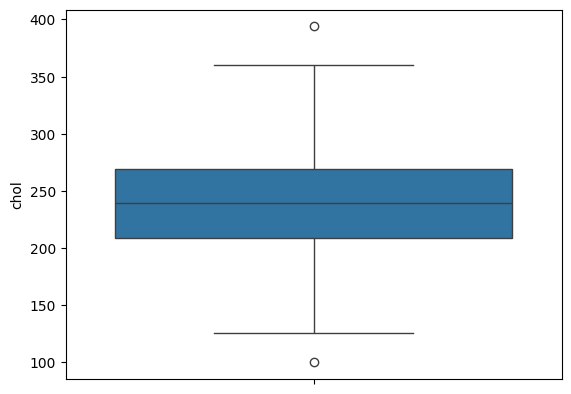

In [430]:
sns.boxplot(data=data_cleaned['chol']);

## Mức độ dễ (3 câu hỏi)


### Câu hỏi 1: Bao nhiêu phần trăm bệnh nhân trong dữ liệu được chẩn đoán mắc bệnh tim (target = 1)?
- Mục đích: Hiểu tỷ lệ mắc bệnh tim trong tập dữ liệu.

In [431]:
# Phan tram benh nhan mac benh
mac_benh =(len(df_numeric[df_numeric['target']==1])/len(df_numeric))*100
print(f'Ti le mac benh la {mac_benh:.2f}%')

Ti le mac benh la 55.33%


### Câu hỏi 2: Tỷ lệ giữa nam (Male) và nữ (Female) trong dữ liệu là bao nhiêu?
- Mục đích: Phân bố giới tính của bệnh nhân trong tập dữ liệu.

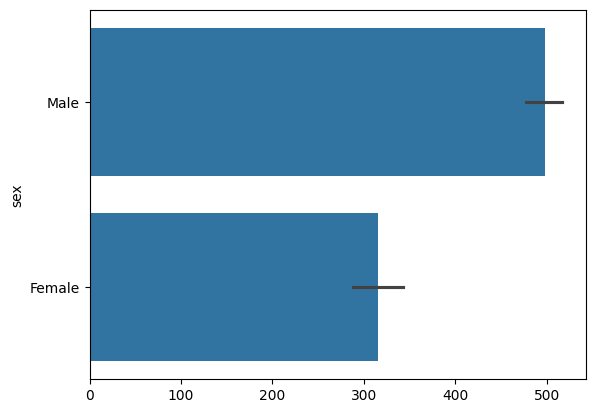

In [432]:
# Ty le nam nu
sns.barplot(data=df_categories['sex']);

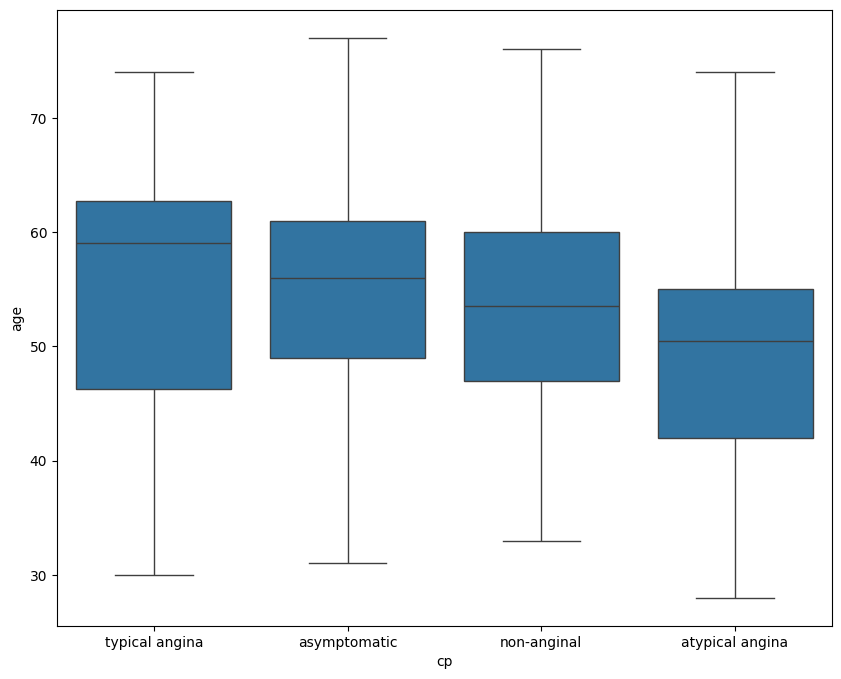

In [433]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_heart, x='cp', y='age');

### Câu hỏi 3: Độ tuổi trung bình của bệnh nhân trong dữ liệu là bao nhiêu?
- Mục đích: Hiểu nhóm tuổi phổ biến trong tập dữ liệu.

In [434]:
df_heart['age'].mean()

53.51086956521739

## Mức độ trung bình (4 câu hỏi)


### Câu hỏi 4: Có sự khác biệt nào về tỷ lệ mắc bệnh tim (target) giữa nam và nữ không?
- Mục đích: Tìm hiểu sự liên quan giữa giới tính và khả năng mắc bệnh tim.

In [435]:
# Tính tỷ lệ mắc bệnh tim theo giới tính
gender_target = df_heart.groupby('sex')['target'].value_counts()
print(gender_target)



sex     target
Female  0         144
        1          50
Male    1         459
        0         267
Name: count, dtype: int64


In [436]:
male = df_heart[df_heart['sex']=='Male']
male_target = df_heart[(df_heart['sex']=='Male')&(df_heart['target']==1)]
male_percent = len(male_target)/len(male)*100
print(f'Phan tram mac benh o nam la: {male_percent:.2f}%')


female = df_heart[df_heart['sex']=='Female']
female_target = df_heart[(df_heart['sex']=='Female')&(df_heart['target']==1)]
female_percent = len(female_target)/len(female)*100
print(f'Phan tram mac benh o nam la: {female_percent:.2f}%')

Phan tram mac benh o nam la: 63.22%
Phan tram mac benh o nam la: 25.77%


### Câu hỏi 5: Nhóm đau ngực nào (cp) phổ biến nhất ở những bệnh nhân không mắc bệnh tim (target = 0)?
- Mục đích: Phân tích kiểu đau ngực ở nhóm không mắc bệnh.

In [437]:
cp_target_0=df_heart['cp'][df_heart['target']==0].value_counts()
cp_target_0

cp
atypical angina    150
non-anginal        131
asymptomatic       104
typical angina      26
Name: count, dtype: int64

In [438]:
df_cp_target_0 = cp_target_0.reset_index()
# Đổi tên các cột cho dễ hiểu
df_cp_target_0.columns = ['cp', 'values']
df_cp_target_0.head()

,cp,values
0,atypical angina,150
1,non-anginal,131
2,asymptomatic,104
3,typical angina,26


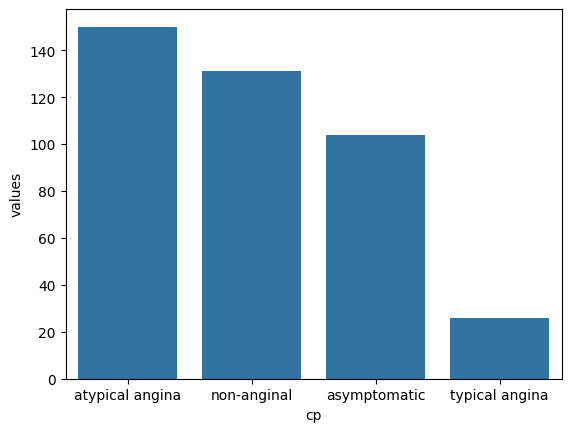

In [439]:
sns.barplot(df_cp_target_0, x='cp', y='values');

### Câu hỏi 6: Huyết áp nghỉ (trestbps) trung bình của bệnh nhân mắc bệnh tim so với bệnh nhân không mắc bệnh có khác biệt không?
- Mục đích: Xem xét mối liên hệ giữa huyết áp và bệnh tim.

In [440]:
trestbps_target_1 = df_heart[['trestbps']][df_heart['target']==1].mean()
trestbps_target_2 = df_heart[['trestbps']][df_heart['target']==0].mean()
print(f'''Huyet ap luc nghi cua nguoi mac benh {trestbps_target_1}\n
Huyet ap luc nghi cua nguoi ko mac benh {trestbps_target_2}''')

Huyet ap luc nghi cua nguoi mac benh trestbps    133.978723
dtype: float64

Huyet ap luc nghi cua nguoi ko mac benh trestbps    129.913043
dtype: float64


In [441]:
trestbps_target_1 = df_heart[['trestbps']][df_heart['target']==1].mean()
df_trestbps_target_1 = trestbps_target_1.reset_index()
df_trestbps_target_1.columns=['index', 'values']
df_trestbps_target_1

,index,values
0,trestbps,133.978723


In [442]:
trestbps_target_2 = df_heart[['trestbps']][df_heart['target']==0].mean()
df_trestbps_target_2 = trestbps_target_2.reset_index()
df_trestbps_target_2.columns=['index', 'values']
df_trestbps_target_2

,index,values
0,trestbps,129.913043


In [443]:
df_merge_trestpbs = pd.merge(df_trestbps_target_1, df_trestbps_target_2, how='inner', on=['index'])
df_merge_trestpbs

,index,values_x,values_y
0,trestbps,133.978723,129.913043


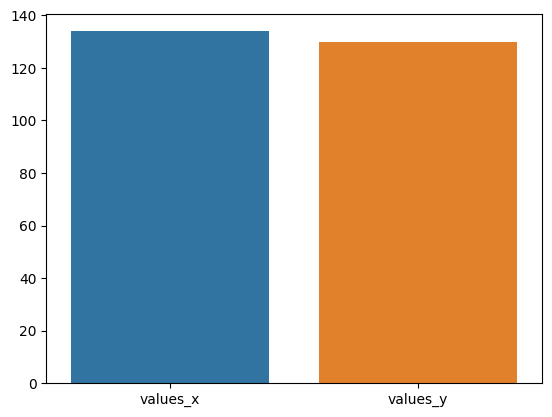

In [444]:
sns.barplot(data=df_merge_trestpbs);

### Câu hỏi 7: Nhóm bệnh nhân có giá trị cholesterol (chol) trung bình cao hơn hay thấp hơn những người không mắc bệnh tim?
- Mục đích: Đánh giá mối quan hệ giữa nồng độ cholesterol và bệnh tim.

In [445]:
chol_targer_1 = df_heart['chol'][df_heart['target']==1].mean()
chol_target_0 = df_heart['chol'][df_heart['target']==0].mean()
print(chol_target_0, chol_targer_1)

227.90561224489795 176.47991967871485


In [446]:
df_chol_target_1 = df_heart[df_heart['target']==1]
df_chol_target_1.describe(include='all')

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
count,509.000000,509.000000,509,509,470.000000,498.000000,433,507,474.000000,474,468.000000,393,144.000000,247,509.0
unique,NaN,NaN,2,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3,NaN
top,NaN,NaN,Male,asymptomatic,NaN,NaN,False,normal,NaN,True,NaN,flat,NaN,reversable defect,NaN
freq,NaN,NaN,459,392,NaN,NaN,339,283,NaN,282,NaN,266,NaN,154,NaN
mean,545.479371,55.903733,NaN,NaN,133.978723,176.479920,NaN,NaN,128.261603,NaN,1.262607,NaN,1.131944,NaN,1.0
std,264.886869,8.718959,NaN,NaN,20.552278,127.517611,NaN,NaN,24.024193,NaN,1.197424,NaN,1.012140,NaN,0.0
min,2.000000,31.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,0.000000,NaN,1.0
25%,286.000000,51.000000,NaN,NaN,120.000000,0.000000,NaN,NaN,112.000000,NaN,0.000000,NaN,0.000000,NaN,1.0
50%,608.000000,57.000000,NaN,NaN,130.000000,218.000000,NaN,NaN,128.000000,NaN,1.050000,NaN,1.000000,NaN,1.0
75%,751.000000,62.000000,NaN,NaN,145.000000,267.750000,NaN,NaN,145.000000,NaN,2.000000,NaN,2.000000,NaN,1.0


In [447]:
df_chol_target_0 = df_heart[df_heart['target']==0]
df_chol_target_0.describe(include='all')

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
count,411.000000,411.000000,411,411,391.000000,392.000000,397,411,391.000000,391,390.000000,218,165.000000,187,411.0
unique,NaN,NaN,2,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3,NaN
top,NaN,NaN,Male,atypical angina,NaN,NaN,False,normal,NaN,False,NaN,upsloping,NaN,normal,NaN
freq,NaN,NaN,267,150,NaN,NaN,353,268,NaN,336,NaN,125,NaN,138,NaN
mean,355.257908,50.547445,NaN,NaN,129.913043,227.905612,NaN,NaN,148.800512,NaN,0.418205,NaN,0.278788,NaN,0.0
std,226.418610,9.433700,NaN,NaN,16.869867,75.832760,NaN,NaN,23.608692,NaN,0.715636,NaN,0.640006,NaN,0.0
min,1.000000,28.000000,NaN,NaN,80.000000,0.000000,NaN,NaN,69.000000,NaN,-1.100000,NaN,0.000000,NaN,0.0
25%,186.500000,43.000000,NaN,NaN,120.000000,199.000000,NaN,NaN,134.500000,NaN,0.000000,NaN,0.000000,NaN,0.0
50%,345.000000,51.000000,NaN,NaN,130.000000,228.000000,NaN,NaN,151.000000,NaN,0.000000,NaN,0.000000,NaN,0.0
75%,447.500000,57.000000,NaN,NaN,140.000000,269.000000,NaN,NaN,167.500000,NaN,0.800000,NaN,0.000000,NaN,0.0


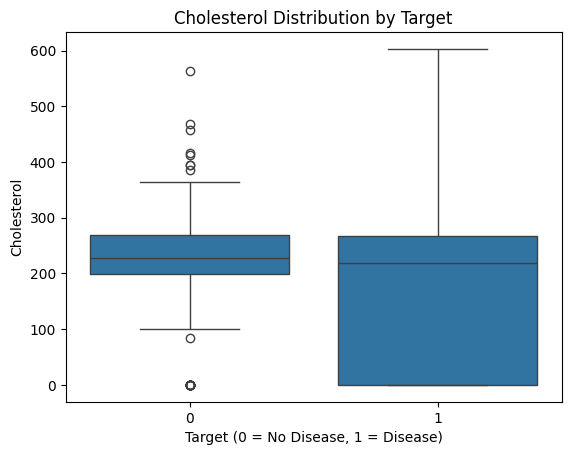

In [448]:
sns.boxplot(data=df_heart, x='target', y='chol')
plt.title('Cholesterol Distribution by Target')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Cholesterol');

In [449]:
df_chol_target_0[df_chol_target_0[['chol']].isna().any(axis=1)]

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
305,306,29,Male,atypical angina,140.0,NaN,False,normal,170.0,False,0.0,NaN,NaN,NaN,0
334,335,39,Male,atypical angina,120.0,NaN,False,st-t abnormality,146.0,False,2.0,upsloping,NaN,NaN,0
337,338,39,Male,atypical angina,130.0,NaN,False,normal,120.0,False,0.0,NaN,NaN,NaN,0
347,348,40,Male,non-anginal,140.0,NaN,False,normal,188.0,False,0.0,NaN,NaN,NaN,0
368,369,43,Female,non-anginal,150.0,NaN,False,normal,175.0,False,0.0,NaN,NaN,normal,0
375,376,45,Female,atypical angina,180.0,NaN,False,normal,180.0,False,0.0,NaN,NaN,NaN,0
378,379,45,Male,non-anginal,135.0,NaN,False,normal,110.0,False,0.0,NaN,NaN,NaN,0
389,390,47,Female,non-anginal,130.0,NaN,False,normal,145.0,False,2.0,flat,NaN,NaN,0
394,395,48,Female,atypical angina,120.0,NaN,True,st-t abnormality,148.0,False,0.0,NaN,NaN,NaN,0
400,401,48,Male,atypical angina,100.0,NaN,False,normal,100.0,False,0.0,NaN,NaN,NaN,0


In [450]:
df_chol_target_0 = df_chol_target_0.dropna(subset='chol')
df_chol_target_0

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
7,8,57,Female,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,905,57,Male,asymptomatic,130.0,207.0,False,st-t abnormality,96.0,True,1.0,flat,NaN,NaN,0
909,910,68,Male,non-anginal,134.0,254.0,True,normal,151.0,True,0.0,NaN,NaN,normal,0
910,911,51,Female,asymptomatic,114.0,258.0,True,lv hypertrophy,96.0,False,1.0,upsloping,NaN,NaN,0
916,917,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0


In [451]:
lower = bound(df_chol_target_0['chol'])[0]
upper = bound(df_chol_target_0['chol'])[1]
lower, upper

(94.0, 374.0)

In [452]:
# Loai bo outliners
df_chol_target_0

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
7,8,57,Female,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,905,57,Male,asymptomatic,130.0,207.0,False,st-t abnormality,96.0,True,1.0,flat,NaN,NaN,0
909,910,68,Male,non-anginal,134.0,254.0,True,normal,151.0,True,0.0,NaN,NaN,normal,0
910,911,51,Female,asymptomatic,114.0,258.0,True,lv hypertrophy,96.0,False,1.0,upsloping,NaN,NaN,0
916,917,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
